# Melt Rate timeseries

Created by Claire Yung

In [1]:
#Load required packages
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import cftime
import cmocean as cm

from netCDF4 import Dataset
import os.path
import matplotlib.colors as colors

Models: 
```
COCO   MITgcm-BAS          MITgcm-JPL  MOM6_SIGMA_ZSTAR  NEMO-CNRS      POP2x
FVCOM  MITgcm_BAS_Coupled  MOM6        MPAS-Ocean        NEMO-UKESM1is  ROMS-UTAS
```

In [2]:
## folder where the isomip-plus github repo is located
baserepo = '/g/data/x77/cy8964/isomip-plus/'
## folder where you downloaded the zipped Google Drive data
basedrive = '/g/data/x77/cy8964/ISOMIP+Data-new/'

# load the data from the text files, which point to the right location of the file in the drive structure
Ocean0_COM = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean0-COM.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean1_COM = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean1-COM.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean2_COM = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean2-COM.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean0_TYP = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean0-TYP.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean1_TYP = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean1-TYP.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean2_TYP = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean2-TYP.txt', dtype = 'str', delimiter = ',',usecols = 0)
def get_labels(expt):
    '''
    Get labels of experiments
    Make some modifications to names
    '''
    labels = []
    for fileIndex in range(len(expt)):
        fileName = expt[fileIndex]
        baseName = os.path.basename(basedrive +fileName)
        modelName = ' '.join(baseName.split('_')[2:]).split('.')[0]
        if "COM" in fileName:
            #make edits to COM names
            if "MOM6" in fileName:
                if "SIGMA_ZSTAR" not in fileName:
                    modelName = modelName + '-LAYER'
            elif "ROMS" in fileName:
                modelName = "ROMS"
        elif "TYP" in fileName:
            # make edits to COM names
            if "MOM6" in fileName:
                modelName = modelName + '-LAYER'
            elif "CNRS" in fileName:
                if "TYPa" in fileName:
                    modelName = modelName + '-TYPa'
                elif "TYPb" in fileName:
                    modelName = modelName + '-TYPb'
            elif "tides" in fileName:
                modelName = "ROMS-tides"
            elif "ROMS" in fileName:
                modelName = "ROMS"
        labels.append(modelName.strip('V3').replace(" ", "-"))
    return labels


# Scalar Timeseries

In [3]:
#12 model colours for 12 models, generated using https://colorbrewer2.org/#type=qualitative&scheme=Paired&n=12
modelcolours=['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']
modellines=['--','-','-','--','dotted','-.',(0,(1,0.5)),'-','-','--','-','-']

Ocean1_COM_COCO.nc
Ocean1_COM_FVCOM.nc
Ocean1_COM_MITgcm_BAS.nc
Ocean1_COM_MITgcm_BAS_CoupledV3.nc
Ocean1_COM_MITgcm_JPL.nc
Ocean1_COM_MOM6_SIGMA_ZSTAR.nc
Ocean1_COM_MOM6.nc
Ocean1_COM_MPAS-Ocean.nc
Ocean1_COM_NEMO-CNRS.nc
Ocean1_COM_NEMO-UKESM1is.nc
Ocean1_COM_POP2x.nc
Ocean1_COM_ROMSUTAS.nc
Ocean2_COM_COCO.nc
Ocean2_COM_FVCOM.nc
Ocean2_COM_MITgcm_BAS.nc
Ocean2_COM_MITgcm_BAS_CoupledV3.nc
Ocean2_COM_MITgcm_JPL.nc
Ocean2_COM_MOM6_SIGMA_ZSTAR.nc
Ocean2_COM_MOM6.nc
Ocean2_COM_MPAS-Ocean.nc
Ocean2_COM_NEMO-CNRS.nc
Ocean2_COM_NEMO-UKESM1is.nc
Ocean2_COM_POP2x.nc
Ocean2_COM_ROMSUTAS.nc


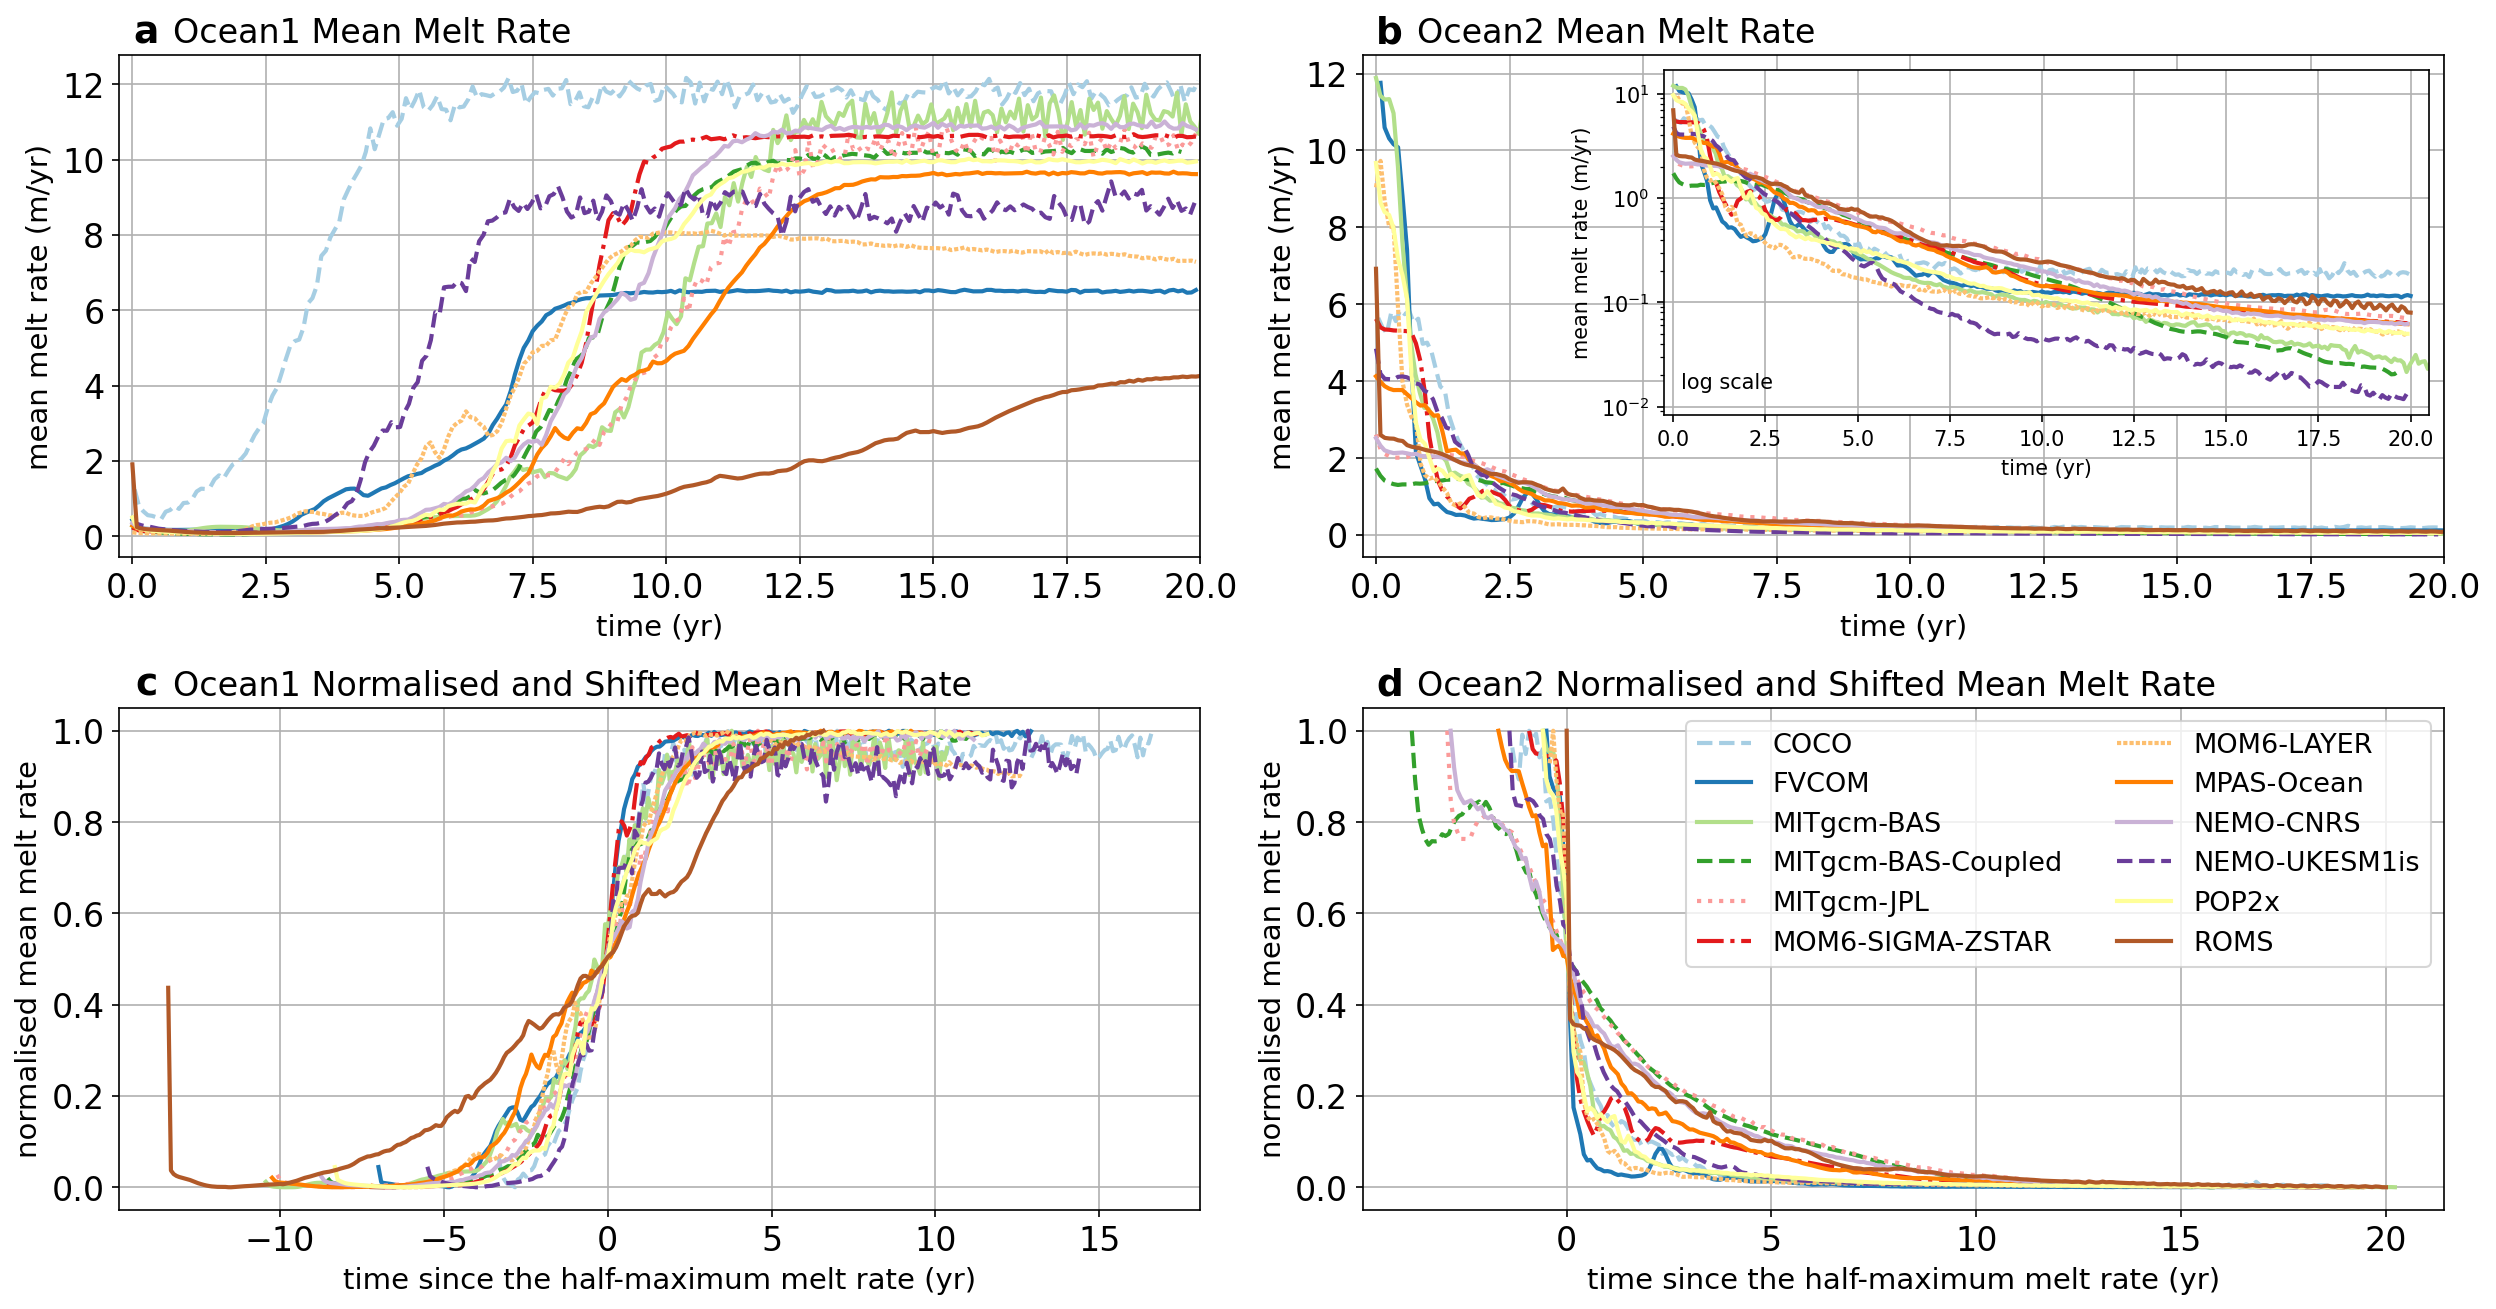

In [4]:
fig, axes = plt.subplots(figsize = (20,10),nrows = 2, ncols =2, dpi=150)

files = Ocean1_COM

#####

sPerYr = 365.*24.*60.*60.
GTPerKg = 1e-12

fieldName = 'meanMeltRate'
scale = sPerYr
labels = get_labels(files)
for i in np.arange(len(files)):
  fileName = files[i]
  ncFile = Dataset(basedrive +fileName,'r')
  baseName = os.path.basename(basedrive +fileName)
  print(baseName)
  label = labels[i]

  try:
    times = np.array(ncFile.variables['time'][:], dtype=float)/sPerYr
  except KeyError:
    # fill in missing time array with best guess
    nTime = len(ncFile.dimensions['nTime'])
    times = np.arange(nTime)/12.0


  field = scale*np.array(ncFile.variables[fieldName][:], dtype=float)
  axes[0,0].plot(times, field, label=label,color = modelcolours[i],linestyle= modellines[i],lw = 2)
  

  field = scale*np.array(ncFile.variables[fieldName][:], dtype=float)
  midptfield = 0.5 * (np.max(field) + np.min(field))
  shiftax = times[np.nanargmin(field*np.where(field>midptfield,1,np.nan))]
  normalampfield = (field - np.min(field))/(np.max(field)-np.min(field))
  #print(field*np.where(field>midptfield,1,np.nan))
  #print(shiftax)
  axes[1,0].plot(times - shiftax, normalampfield, label=label,color = modelcolours[i],linestyle= modellines[i],lw = 2)

axes[0,0].set_xlabel('time (yr)', fontsize = 14)
axes[0,0].set_ylabel('mean melt rate (m/yr)', fontsize = 14)
axes[0,0].set_xlim(-0.25,20)
axes[0,0].text(0.025,1.045,'a',horizontalalignment='center', fontweight='bold',
     verticalalignment='center',transform=axes[0,0].transAxes, fontsize = 18)
axes[0,0].tick_params(labelsize=16)

axes[0,0].set_title('Ocean1 Mean Melt Rate', fontsize = 16,ha='left', x=0.05)

axes[1,0].set_xlabel('time since the half-maximum melt rate (yr)', fontsize = 14)
axes[1,0].set_ylabel('normalised mean melt rate', fontsize = 14)
axes[1,0].set_title('Ocean1 Normalised and Shifted Mean Melt Rate', fontsize = 16,ha='left', x=0.05)
axes[1,0].text(0.025,1.045,'c',horizontalalignment='center', fontweight='bold',
     verticalalignment='center',transform=axes[1,0].transAxes, fontsize = 18)
axes[1,0].tick_params(labelsize=16)

#####

files = Ocean2_COM

#####

sPerYr = 365.*24.*60.*60.
GTPerKg = 1e-12

fieldName = 'meanMeltRate'
scale = sPerYr
ax_inset = fig.add_axes([0.64,0.64,0.255,0.23])
labels = get_labels(files)

for i in np.arange(len(files)):
  fileName = files[i]
  ncFile = Dataset(basedrive +fileName,'r')
  baseName = os.path.basename(basedrive +fileName)
  print(baseName)
  label = labels[i]

  try:
    times = np.array(ncFile.variables['time'][:], dtype=float)/sPerYr
  except KeyError:
    # fill in missing time array with best guess
    nTime = len(ncFile.dimensions['nTime'])
    times = np.arange(nTime)/12.0


  field = scale*np.array(ncFile.variables[fieldName][:], dtype=float)
  axes[0,1].plot(times, field, label=label,color = modelcolours[i],linestyle= modellines[i],lw = 2)
  ax_inset.plot(times, field, label=label,color = modelcolours[i],linestyle= modellines[i],lw = 2)

  field = scale*np.array(ncFile.variables[fieldName][:], dtype=float)
  midptfield = 0.5 * (np.max(field) + np.min(field))
  shiftax = times[np.nanargmin(field*np.where(field>midptfield,1,np.nan))]
  normalampfield = (field - np.min(field))/(np.max(field)-np.min(field))
  #print(field*np.where(field>midptfield,1,np.nan))
  #print(shiftax)
  axes[1,1].plot(times - shiftax, normalampfield, label=label,color = modelcolours[i],linestyle= modellines[i],lw = 2)

axes[0,1].set_xlabel('time (yr)', fontsize = 14)
axes[0,1].set_ylabel('mean melt rate (m/yr)', fontsize = 14)
axes[0,1].set_xlim(-0.25,20)
#axes[0,1].legend()
axes[0,1].set_title('Ocean2 Mean Melt Rate', fontsize = 16,ha='left', x=0.05)
axes[0,1].text(0.025,1.045,'b',horizontalalignment='center', fontweight='bold',
     verticalalignment='center',transform=axes[0,1].transAxes, fontsize = 18)
axes[0,1].tick_params(labelsize=16)


ax_inset.set_xlabel('time (yr)')
ax_inset.set_ylabel('mean melt rate (m/yr)')
ax_inset.set_yscale('log')
ax_inset.text(0.2,1.5e-2,'log scale')
ax_inset.set_xlim(-0.25,20.5)

axes[1,1].set_xlabel('time since the half-maximum melt rate (yr)', fontsize = 14)
axes[1,1].set_ylabel('normalised mean melt rate', fontsize = 14)
axes[1,1].set_title('Ocean2 Normalised and Shifted Mean Melt Rate', fontsize = 16,ha='left', x=0.05)
axes[1,1].text(0.025,1.045,'d',horizontalalignment='center', fontweight='bold',
     verticalalignment='center',transform=axes[1,1].transAxes, fontsize = 18)
axes[1,1].tick_params(labelsize=16)


axes[0,0].grid()
axes[0,1].grid()
axes[1,0].grid()
axes[1,1].grid()
ax_inset.grid()

axes[1,1].legend(loc = 'upper right', fontsize = 13, ncol = 2)


fig.subplots_adjust(hspace = 0.3, wspace = 0.15)